**Import the library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import json

**Import the dataset**

In [ ]:
with open('mentalhealth.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."


**Separating the patterns based on their tags (intents) and responses and then converting them into a DataFrame that can be easily manipulated, analyzed, and utilized for model training and evaluation.**

In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
433,fact-202,How does medication management work in treatin...,[Medication management for substance use disor...
434,fact-203,What are some common types of therapy for subs...,[Common types of therapy for substance use dis...
435,fact-204,How does medication management work in treatin...,[Medication management for eating disorders in...
436,fact-205,What are some common types of therapy for eati...,[Common types of therapy for eating disorders ...


In [ ]:
df['tag'].unique()


array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'HAI-Chatbot-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'mental-health',
       'mental-health-important', 'depression-definition', 'depression',
       'therapist', 'therapy', 'therapy-types', 'mental-illness-affect',
       'mental-illness', 'mental-illness-treatment',
       'mental-illness-recover', 'symptoms-mental-disorder',
       'professional', 'mental-health-treatment', 'ment

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Applying remove_stopwords function to the 'patterns' column in the DataFrame
df['patterns'] = df['patterns'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'HAI-Chatbot-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'mental-health',
       'mental-health-important', 'depression-definition', 'depression',
       'therapist', 'therapy', 'therapy-types', 'mental-illness-affect',
       'mental-illness', 'mental-illness-treatment',
       'mental-illness-recover', 'symptoms-mental-disorder',
       'professional', 'mental-health-treatment', 'ment

**Exploratory Data Analysis (EDA) - Visualization**

- Analyze the distribution of intents in the dataset.
- Visualize the frequency of different intents using a bar plot from the Plotly library. The x-axis can represent the intents, and the y-axis can represent the count of patterns or responses associated with each intent.

In [ ]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

**Word Cloud**

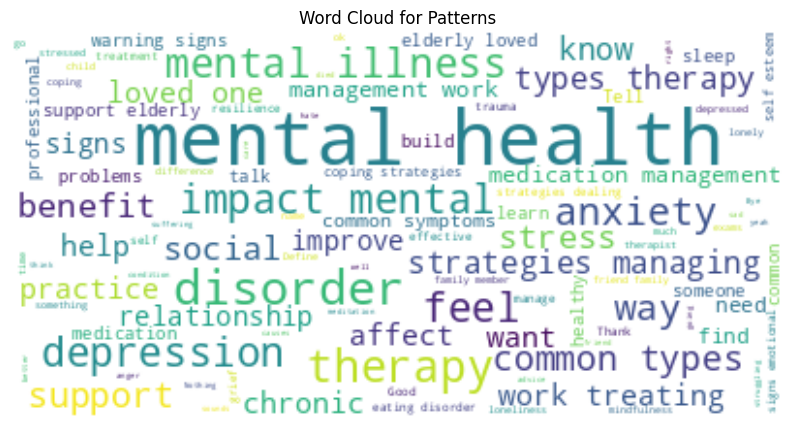

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

**Patterns Length Distribution**

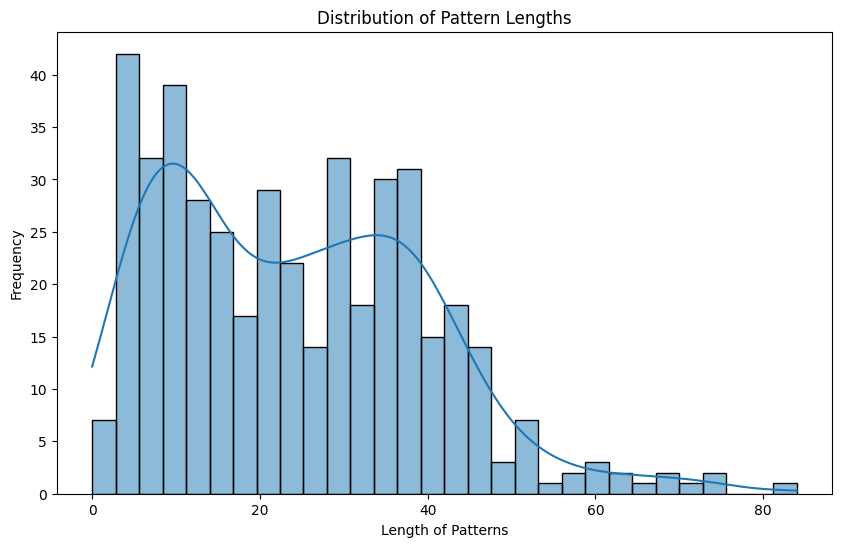

In [ ]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

**Distribution of Intents**

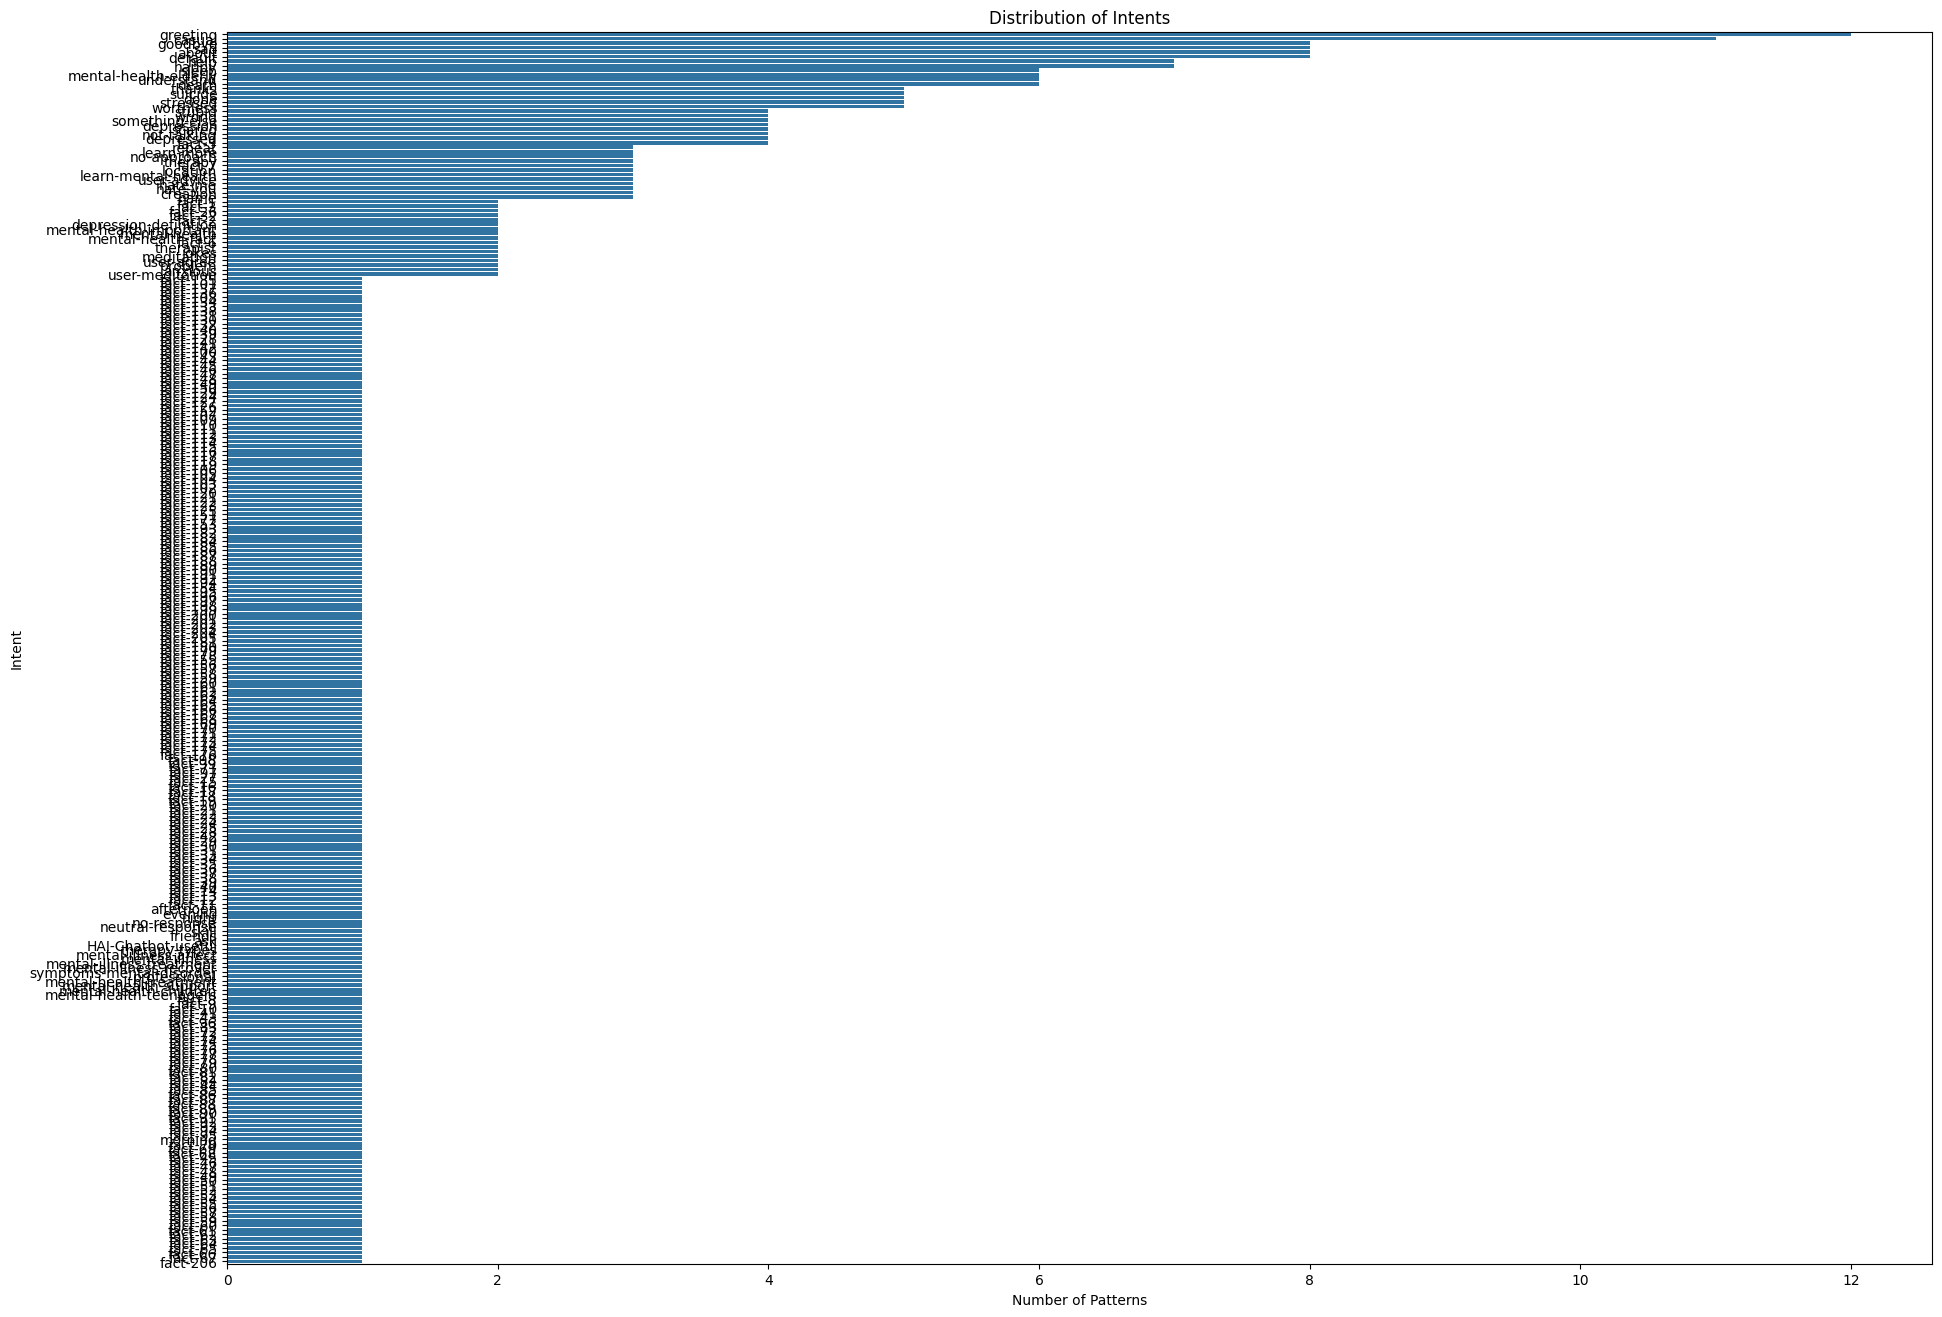

In [ ]:
plt.figure(figsize=(22, 16))
sns.countplot(y='tag', data=df, order=df['tag'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()

**Number of Unique Responses per Intent**

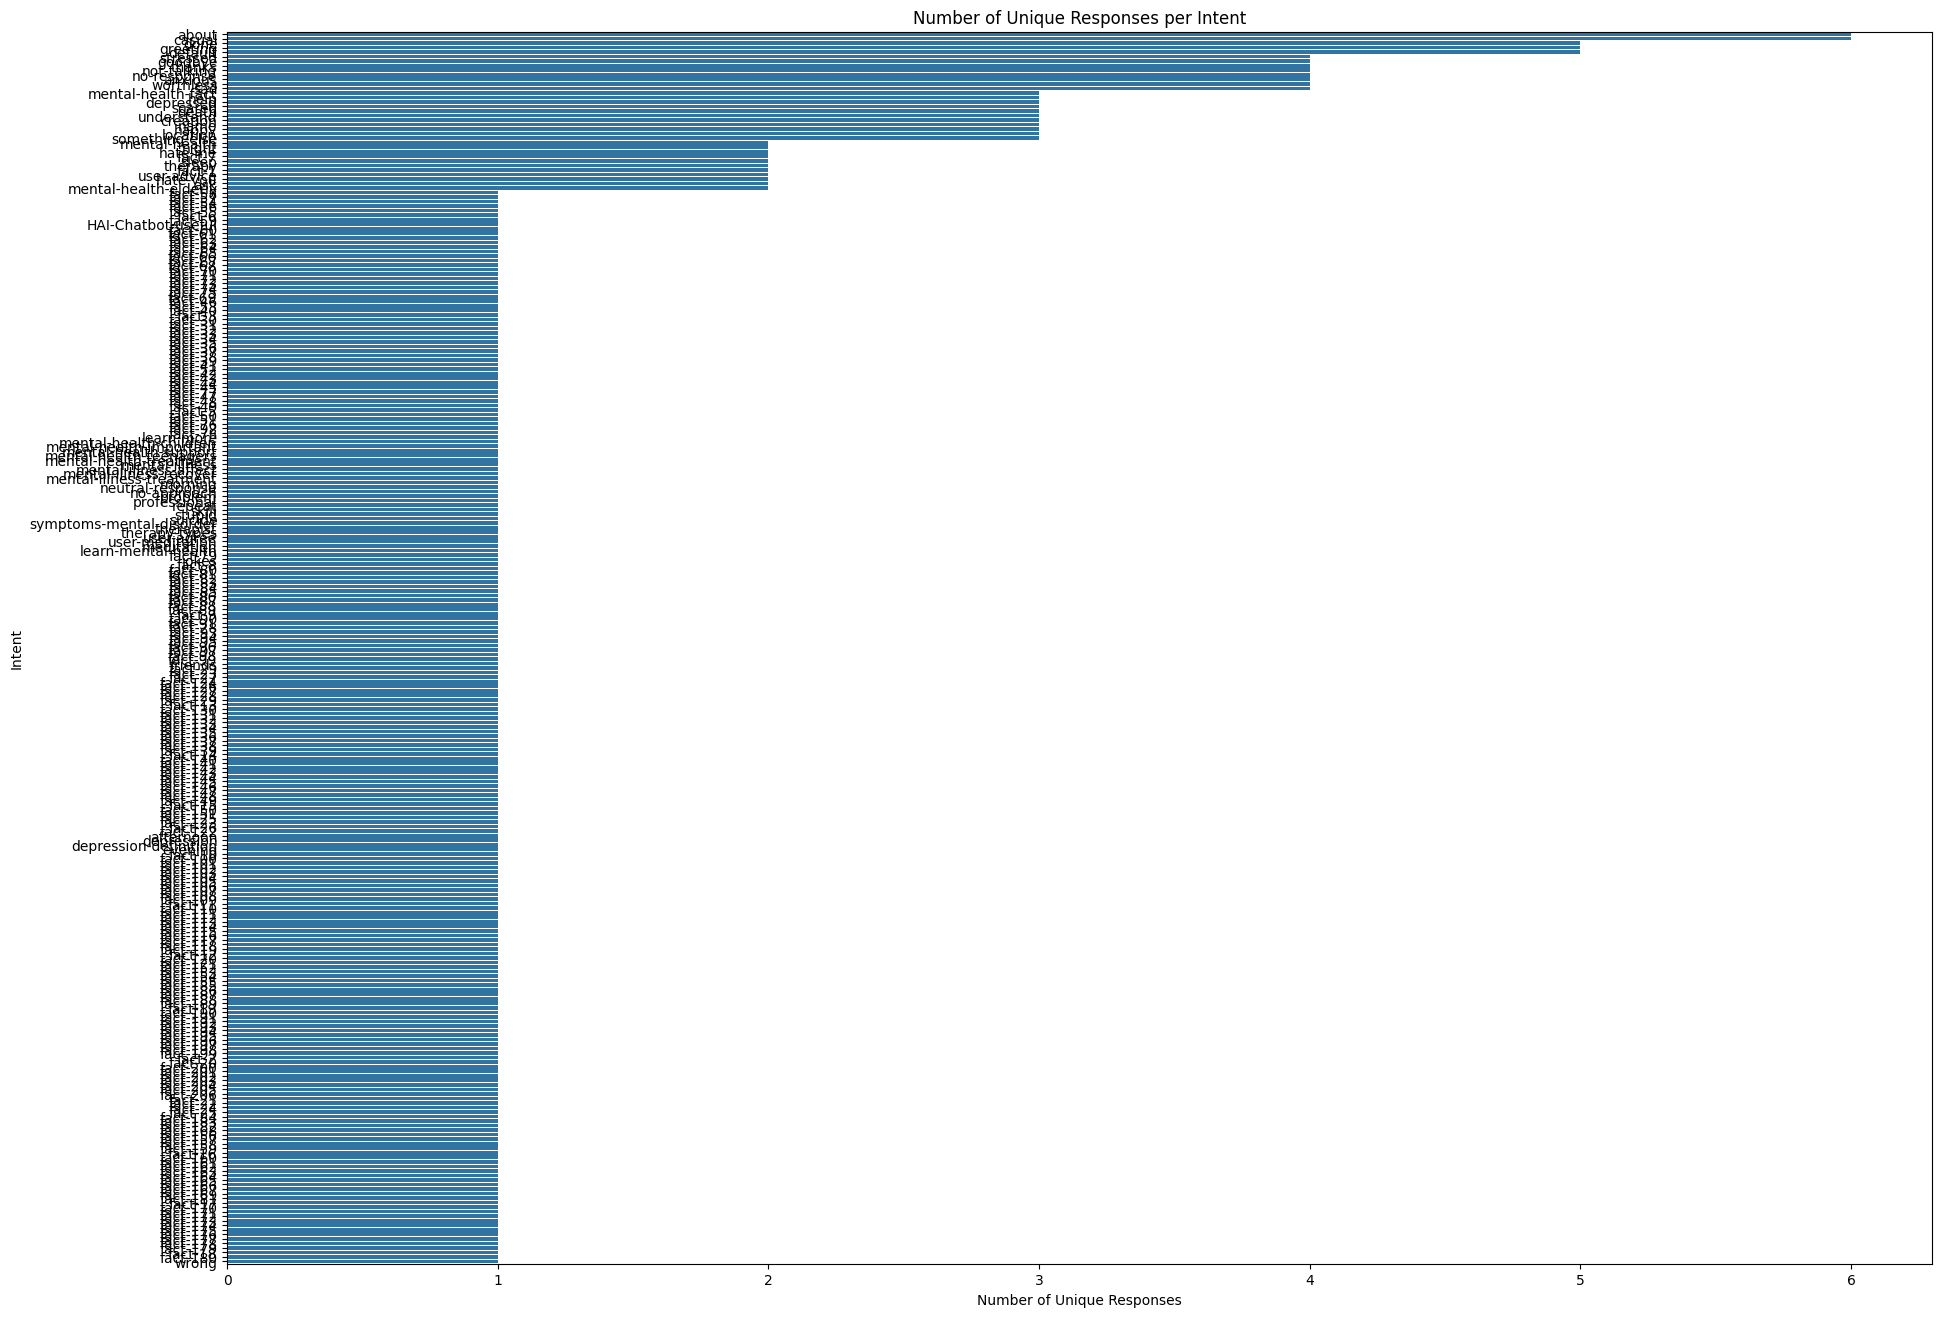

In [ ]:
df_unique_responses = df_responses.groupby('tag')['responses'].nunique().reset_index(name='unique_responses')
plt.figure(figsize=(22, 16))
sns.barplot(x='unique_responses', y='tag', data=df_unique_responses.sort_values('unique_responses', ascending=False))
plt.title('Number of Unique Responses per Intent')
plt.xlabel('Number of Unique Responses')
plt.ylabel('Intent')
plt.show()

**Response Length Distribution**

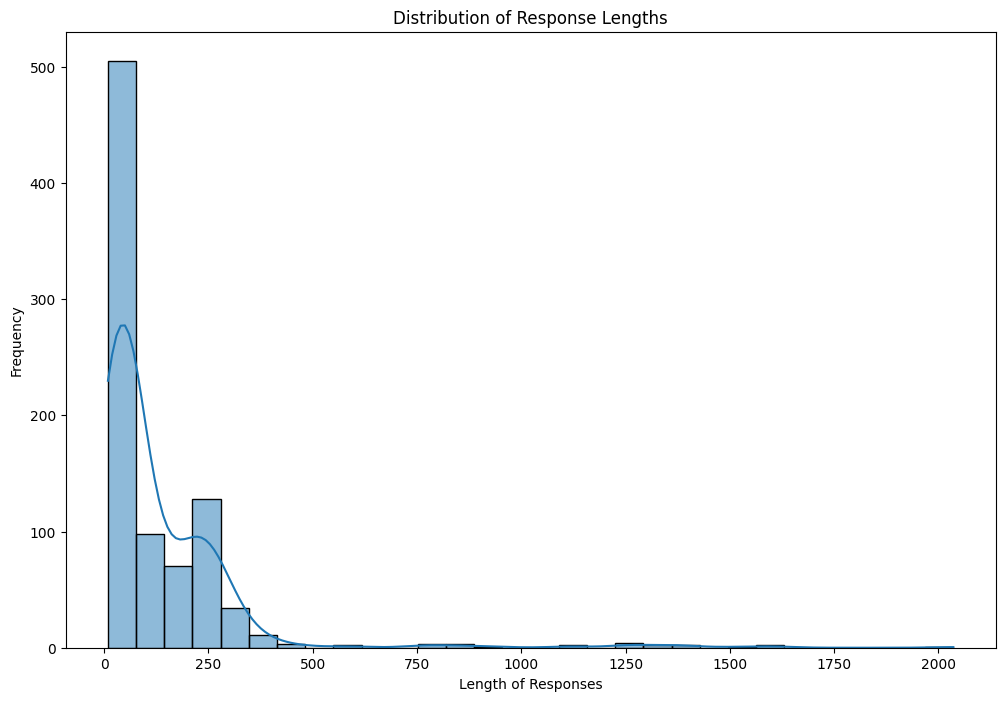

In [ ]:
df_responses['response_length'] = df_responses['responses'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df_responses['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Responses')
plt.ylabel('Frequency')
plt.show()

**Data Preprocessing**

In [ ]:
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3
2,greeting,anyone there,[Hello there. Tell me how are you feeling toda...,13
3,greeting,hi,[Hello there. Tell me how are you feeling toda...,2
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5
...,...,...,...,...
433,fact,medication management work treating substance ...,[Medication management for substance use disor...,60
434,fact,common types therapy substance use disorders,[Common types of therapy for substance use dis...,45
435,fact,medication management work treating eating dis...,[Medication management for eating disorders in...,53
436,fact,common types therapy eating disorders,[Common types of therapy for eating disorders ...,38


In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'hai chatbot useful', 'user advice',
       'learn mental health', 'mental health fact', 'mental health',
       'mental health important', 'depression definition', 'depression',
       'therapist', 'therapy', 'therapy types', 'mental illness affect',
       'mental illness', 'mental illness treatment',
       'mental illness recover', 'symptoms mental disorder',
       'professional', 'mental health treatment', 'ment

In [ ]:
len(df['tag'].unique())

68

In [ ]:
X = df['patterns']
y = df['tag']

**Build and Train Model**

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

# Model and Optimization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ber

**Training the Model**

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()

        logits = outputs[1]
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == b_labels).sum().item()
        total_predictions += b_labels.size(0)

        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    accuracy = correct_predictions / total_predictions

    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}, Accuracy: {accuracy:.2f}")

Epoch 1, Average Training Loss: 3.45, Accuracy: 0.40
Epoch 2, Average Training Loss: 2.59, Accuracy: 0.50
Epoch 3, Average Training Loss: 2.32, Accuracy: 0.53
Epoch 4, Average Training Loss: 2.19, Accuracy: 0.53
Epoch 5, Average Training Loss: 2.08, Accuracy: 0.55
Epoch 6, Average Training Loss: 1.96, Accuracy: 0.57
Epoch 7, Average Training Loss: 1.89, Accuracy: 0.61
Epoch 8, Average Training Loss: 1.81, Accuracy: 0.65
Epoch 9, Average Training Loss: 1.68, Accuracy: 0.69
Epoch 10, Average Training Loss: 1.62, Accuracy: 0.74


**Predicting**

In [62]:
def predict_intent(text):
    # Tokenize and encode the text for BERT
    encoded_dict = tokenizer.encode_plus(
        text,                      # Input text
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
        max_length=max_len,        # Pad or truncate to max length
        pad_to_max_length=True,    # Pad to max length
        return_attention_mask=True,# Construct attn. masks
        return_tensors='pt',       # Return pytorch tensors
    )

    # Extract input IDs and attention masks from the encoded representation
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    # No gradient calculation needed
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    # Use softmax to calculate probabilities
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()

    # Get the predicted label with the highest probability
    predicted_label_idx = np.argmax(probabilities, axis=1).flatten()

    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]

    return predicted_label, probabilities[0][predicted_label_idx]


In [63]:
# Save the model
model.save_pretrained('bert_model')
tokenizer.save_pretrained('bert_model')
label_encoder.classes_

array(['about', 'afternoon', 'anxious', 'ask', 'casual', 'creation',
       'death', 'default', 'depressed', 'depression',
       'depression definition', 'done', 'evening', 'fact', 'friends',
       'goodbye', 'greeting', 'hai chatbot useful', 'happy', 'hate me',
       'hate you', 'help', 'jokes', 'learn mental health', 'learn more',
       'location', 'meditation', 'mental health',
       'mental health children', 'mental health elderly',
       'mental health fact', 'mental health important',
       'mental health support', 'mental health teenagers',
       'mental health treatment', 'mental illness',
       'mental illness affect', 'mental illness recover',
       'mental illness treatment', 'morning', 'name', 'neutral response',
       'night', 'no approach', 'no response', 'not talking', 'problem',
       'professional', 'repeat', 'sad', 'scared', 'skill', 'sleep',
       'something else', 'stressed', 'stupid', 'suicide',
       'symptoms mental disorder', 'thanks', 'therapist',

In [64]:
# Load the model
model = BertForSequenceClassification.from_pretrained('bert_model')
tokenizer = BertTokenizer.from_pretrained('bert_model')

**Chatbot Usage**

In [66]:
def chatbot():
    print("Welcome to the Mental Health Chatbot!")
    print("Type 'exit' to end the conversation.")

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye! Take care.")
            break

        predicted_intent, _ = predict_intent(user_input)

        # Check if there are any rows matching the predicted intent
        filtered_responses = df_responses[df_responses['tag'] == predicted_intent]
        if not filtered_responses.empty:
            response = filtered_responses['responses'].sample().values[0]
        else:
            response = "I'm sorry, I don't know how to respond to that."

        print(f"Chatbot: {response}")

chatbot()

Welcome to the Mental Health Chatbot!
Type 'exit' to end the conversation.
You: hello


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: Great to see you. How do you feel currently?
You: what is medical health?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: I'm sorry, I don't know how to respond to that.
You: Who are you?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: Hello there. Glad to see you're back. What's going on in your world right now?
You: Who are you?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: Hello there. Tell me how are you feeling today?
You: Who are you?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: Hello there. Tell me how are you feeling today?
You: I am feeling lonely


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: How long have you been feeling this way?
You: I am feeling lonely


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: How long have you been feeling this way?
You: I have insomnia


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: I'm sorry, I don't know how to respond to that.
You: My brother died


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: I am really sorry to hear that. I am here to help you with grief, anxiety and anything else you may feel at this time.
You: You can't help me


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: Let's discuss further why you're feeling this way.
You: I want to kill myself


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 08.
You: Thank you


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Chatbot: You're most welcome!
You: exit
Chatbot: Goodbye! Take care.
